<a href="https://colab.research.google.com/github/kotlanandu525/PCA/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.decomposition import PCA
iris=load_iris()
x=iris.data
y=iris.target

In [ ]:
x_scaled=StandardScaler().fit_transform(x)

In [ ]:
x.shape

(150, 4)

In [ ]:
pca=PCA()
x_pca=pca.fit_transform(x_scaled)


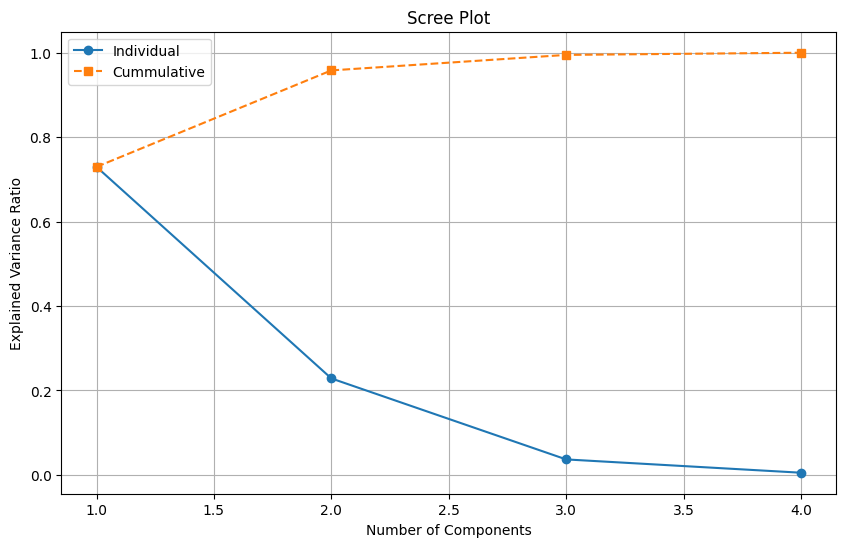

In [ ]:
#scree plot
plt.figure(figsize=(10,6))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,'o-',label='Individual')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_),'s--',label='Cummulative')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
pca_95=PCA(n_components=0.95)
x_reduced=pca_95.fit_transform(x_scaled)
print(f"reduced shape:{x_reduced.shape}")

reduced shape:(150, 2)


**Visuaize top 2 components**

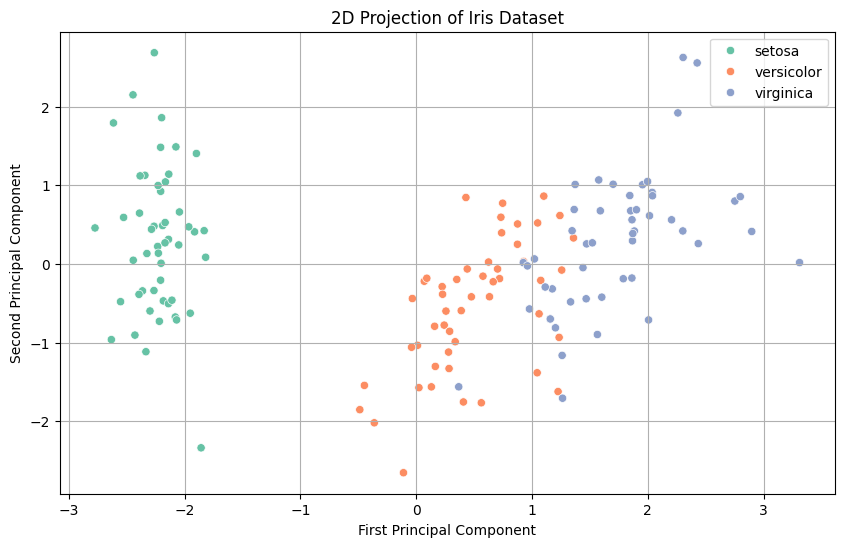

In [ ]:
pca_2d=PCA(n_components=2)
x_2d=pca_2d.fit_transform(x_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=x_2d[:,0], y=x_2d[:,1], hue=iris.target_names[y], palette='Set2')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D Projection of Iris Dataset')
plt.grid(True)
plt.show()

In [31]:
path = "/content/marketing_campaign.csv"
df = pd.read_csv(path, sep="\t")

In [32]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [33]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [36]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
# Verify that there are no more nulls in Income
print(f"Missing values in Income: {df['Income'].isnull().sum()}")

Missing values in Income: 0


In [46]:
x=df.select_dtypes(include=['number'])
y = df.loc[x.index, "Response"]

In [47]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [48]:
pca=PCA()
x_pca=pca.fit_transform(x_scaled)

In [49]:
pca_95=PCA(n_components=0.95)
x_reduced=pca_95.fit_transform(x_scaled)
print(f"reduced shape:{x_reduced.shape}")

reduced shape:(2240, 20)


In [50]:
pca_2d=PCA(n_components=2)
x_2d=pca_2d.fit_transform(x_scaled)

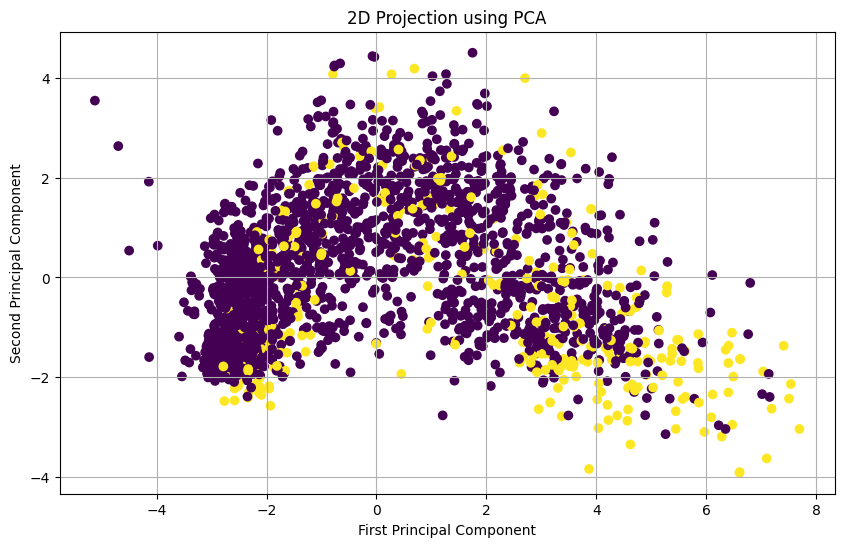

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1],c=y)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("2D Projection using PCA")
plt.grid(True)
plt.show()
